## UAS Machine Learning

**Nama**  : Ilham Novriadi  
**NIM**   : 231011403539  
**Topik** : Analisis & Prediksi Penyakit Jantung menggunakan Decision Tree

# Bagian 2 – Implementasi Model

Dalam bagian ini, kita akan menggunakan Python dan Scikit-Learn untuk memprediksi penyakit jantung menggunakan dataset **Heart Disease**.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Konfigurasi visualisasi
sns.set(style="whitegrid")
%matplotlib inline

### 1. Load dan Eksplorasi Dataset (EDA)

In [28]:
# Cek lokasi file dataset untuk menangani perbedaan working directory
file_path = 'heart.csv'

if not os.path.exists(file_path):
    # Coba cari di folder sub-direktori jika notebook dijalankan dari root project
    potential_path = os.path.join('Bagian 2 – Implementasi Model', 'heart.csv')
    if os.path.exists(potential_path):
        file_path = potential_path
    else:
        print(f"Warning: File heart.csv tidak ditemukan di {os.getcwd()} maupun di sub-folder.")

# Memuat dataset
try:
    df = pd.read_csv(file_path)
    print(f"Berhasil memuat dataset dari: {file_path}")
    # Menampilkan 5 baris pertama
    display(df.head())
except FileNotFoundError as e:
    print(f"Error: {e}")

Berhasil memuat dataset dari: Bagian 2 – Implementasi Model/heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
# Melihat informasi dataset (tipe data dan missing value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
# Statistik deskriptif
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# Cek missing values
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/var/folders/p6/p_pyz7912z18vcsnx1stkbnh0000gn/T/ipykernel_91703/2646305348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


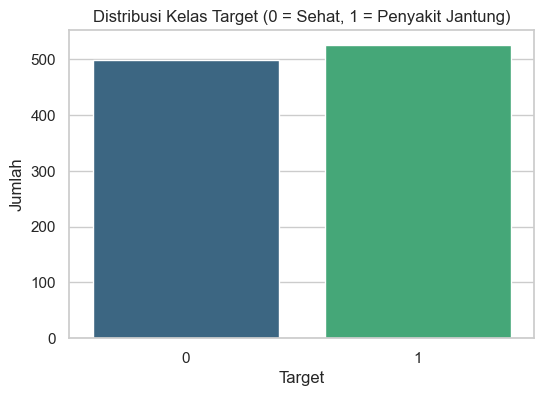

In [32]:
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (0 = Sehat, 1 = Penyakit Jantung)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

### 2. Preprocessing Data

In [33]:
# Menghapus duplikat jika ada
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Menghapus {duplicates} data duplikat...")
    df.drop_duplicates(inplace=True)

# Memisahkan Fitur (X) dan Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi Training dan Testing set (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Menghapus 723 data duplikat...
Jumlah data training: 241
Jumlah data testing: 61


### 3. Membangun Model Decision Tree

In [34]:
# Inisialisasi model Decision Tree
# Kita batasi kedalaman pohon (max_depth) untuk mencegah overfitting
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 4. Evaluasi Model

Akurasi Model: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



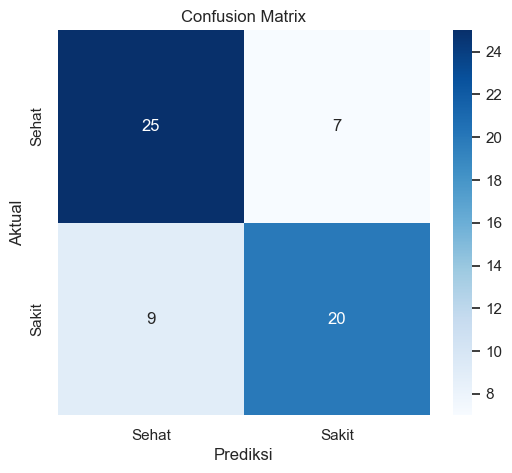

In [35]:
# Prediksi pada data test
y_pred = dt_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Sakit'], yticklabels=['Sehat', 'Sakit'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### 5. Visualisasi Pohon Keputusan

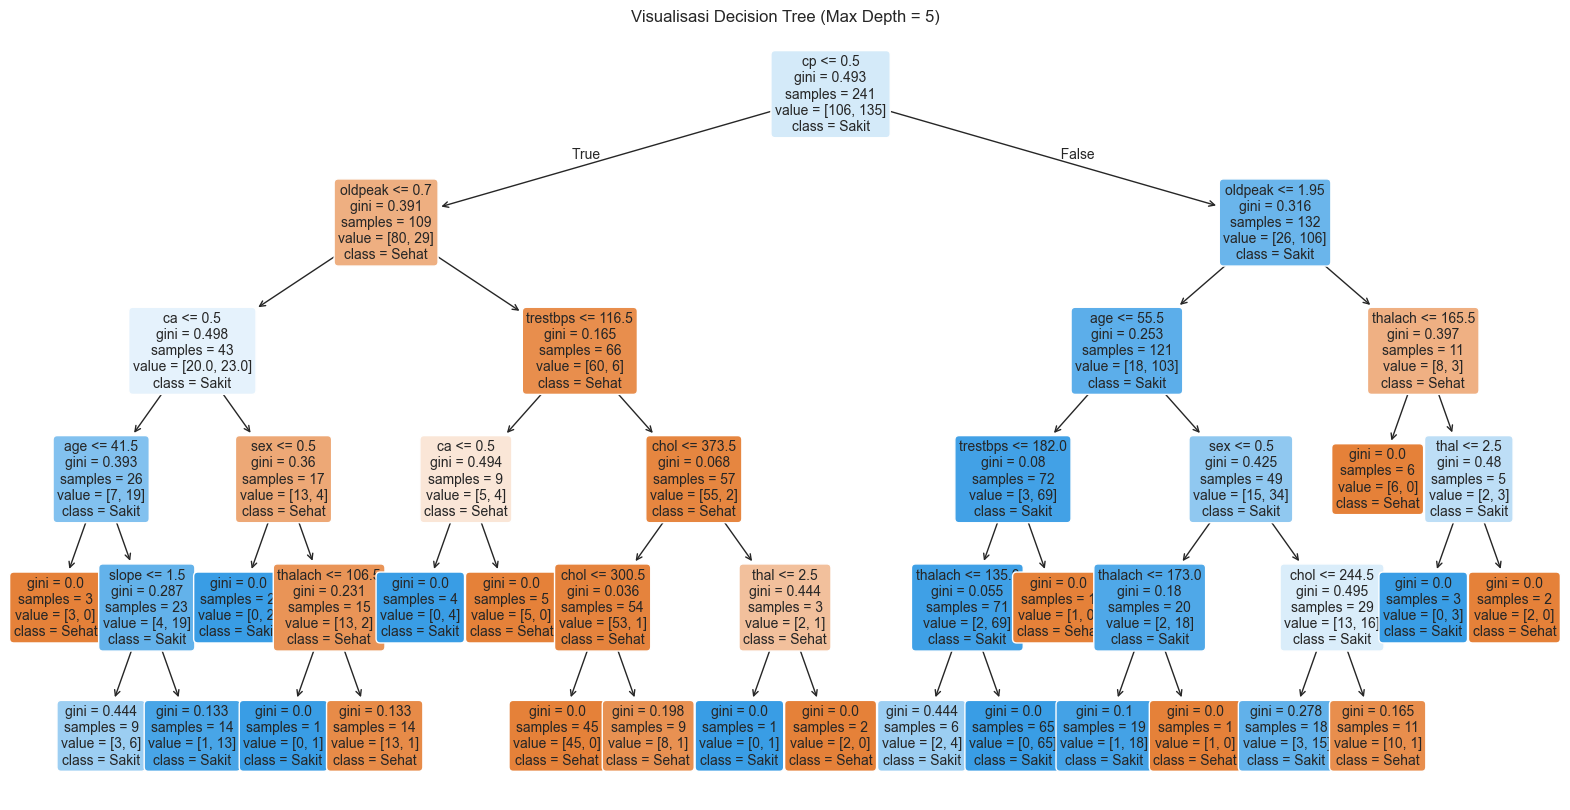

In [36]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Sehat', 'Sakit'], filled=True, rounded=True, fontsize=10)
plt.title("Visualisasi Decision Tree (Max Depth = 5)")
plt.show()